In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

import infoshare.utils as utils

In [7]:
# # plotting config
# sns.set_style("white")
# # in inches
TEXTWIDTH = 6.30045
COLWIDTH = 3.03209
# # colormap to use
cmap = sns.diverging_palette(20, 145, as_cmap=True)
# # dictionary of label font config
label_dict = {"weight": "bold"}

In [27]:
pos_eval_path = f"../lightning_logs/roberta-base/en_gum/POS/agg=max_probe=3/evaluation"
pos_acc_drop = utils.get_acc_drop(pos_eval_path, None, suffix_filter=r"^([a-z]+)$")

dep_eval_path = f"../lightning_logs/roberta-base/en_gum/DEP/agg=mean_probe=3_concat-mode=ONLY/evaluation"
dep_acc_drop = utils.get_acc_drop(dep_eval_path, None, suffix_filter=r"^([A-Z]+)$").T

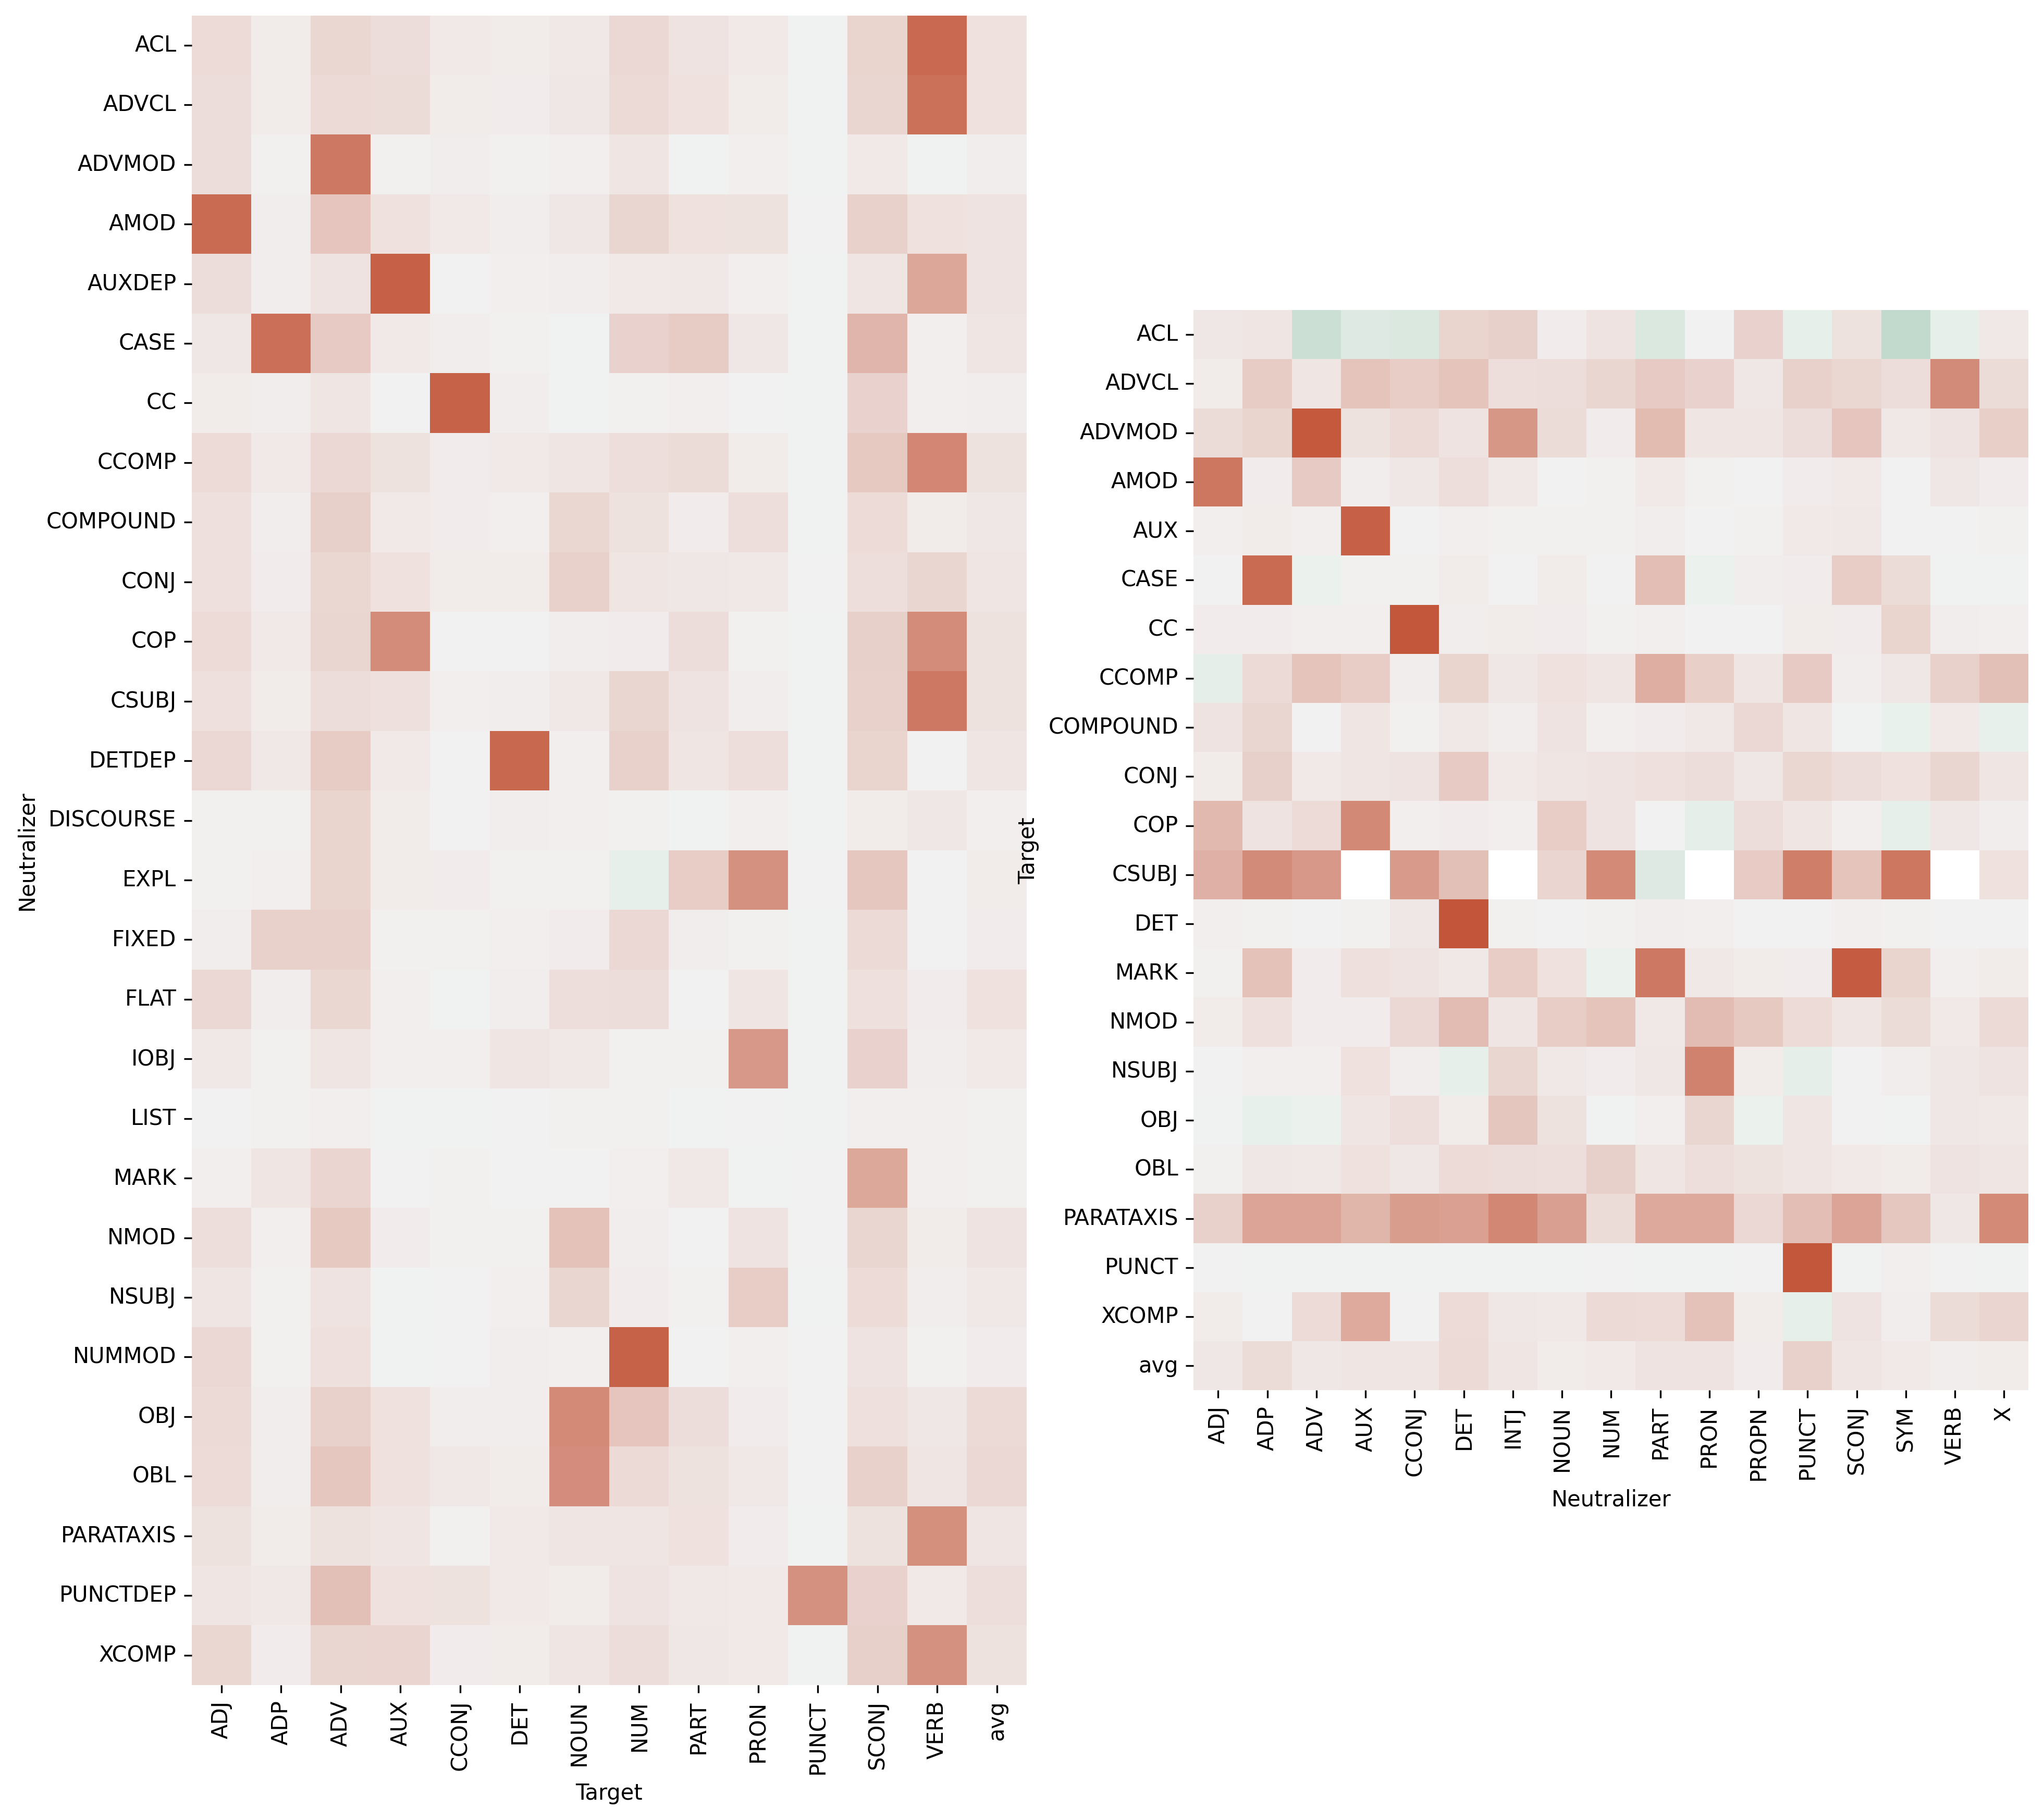

In [28]:
# sns.set_context("paper", font_scale=0.8)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(COLWIDTH * 5, COLWIDTH * 2 * 5), dpi=300)
ax1 = sns.heatmap(
    pos_acc_drop * 100,
    annot=False,
    # annot_kws={"fontsize": 7},
    fmt=".0f",
    cmap=cmap,
    cbar=False,
    ax=ax1,
    vmin=-100,
    vmax=100,
    center=0,
    square=True,
)
ax2 = sns.heatmap(
    dep_acc_drop * 100,
    annot=False,
    # annot_kws={"fontsize": 7},
    fmt=".0f",
    cmap=cmap,
    cbar=False,
    ax=ax2,
    vmin=-100,
    vmax=100,
    center=0,
    square=True,
)
# plt.savefig(
#     "images/cross_task.png",
#     bbox_inches="tight",
# )
plt.show()